<a href="https://colab.research.google.com/github/jeymyson/Projeto-Vendas/blob/master/Clusteriza%C3%A7%C3%A3o_kyte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title 1 - Mount drive
# Mount o drive para permitir o acesso ao CSV que está no meu Google Drive
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#@title 2 -Importanto biblioteca e criando dataframe.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from sklearn.cluster import KMeans
from google.colab import files
from sklearn import metrics
from scipy.spatial.distance import cdist
df = pd.read_csv('/content/drive/MyDrive/Kyte_data/respostas_tratadas.csv')

In [ ]:
#@title 3 - Preparando dataframe para p processo de clusterização.
dataset = df[['Loja física','Loja virtual','Marketplaces Delivery','Marketplaces E-commerce','Telefone','WhatsApp','Catálogo online','Correios e transportadoras','Empresa de entregas','Entrega na região','Entregadores dos apps de delivery','Faz entrega pessoalmente','Motoboys contratados','Não faz entregas','Retirada','First Ramo de atividade','Lifetime','Lifetime pagante','Satisfação']]
AliBeb = dataset #dataset[dataset['First Ramo de atividade']=='Alimentos e bebidas']
df_remove = AliBeb.loc[(df['Loja física']>1) | (df['Loja virtual']>1) |(df['Entrega na região']>1)| (df['Faz entrega pessoalmente']>1) | (df['Retirada']>1) |(df['WhatsApp']>1)]
AliBeb = AliBeb.drop(df_remove.index)

In [ ]:
dropcol = ['First Ramo de atividade','Lifetime','Lifetime pagante','Satisfação']

In [ ]:
#@title 4 - Craindo a função de clusterização da base.
def cluster( dataset, cluster, dropcol ):

  import pandas as pd
  import numpy as np
  from PIL import Image
  from sklearn.cluster import KMeans

  colunas = list(dataset.drop(dropcol,axis =1))
  lengh = len(colunas)

  X = np.array(dataset.drop(dropcol,axis=1))
  Kmeans = KMeans(n_clusters=cluster,random_state =0)
  Kmeans.fit(X)
  dataset['K-classes']=Kmeans.labels_

  df1 = pd.DataFrame()
  df2 = pd.DataFrame()

  for filter in colunas:

    NewCol = filter + '_perc'
    CatTotal = dataset[["K-classes",filter]]
    CatTotal=CatTotal.groupby("K-classes").count()
    CatUse = dataset[["K-classes",filter]]
    CatUse=CatUse[CatUse[filter]>0].groupby("K-classes").count()
    CatTotal = pd.merge(CatUse, CatTotal, left_index=True, right_index=True)
    CatTotal=CatTotal.rename(columns={filter +"_x":"Usam",filter + "_y": "Total"})
    CatTotal=CatTotal.assign(NewCol= CatTotal['Usam']*100/CatTotal['Total'])
    CatTotal.columns.values[2] = NewCol
    df2 =CatTotal[NewCol]
    df1 = pd.concat([df1, df2], axis=1)

  df1 = df1.iloc[:,0:lengh]

  return df1

In [ ]:
#@title 5 - Função para determinar as distorções do modelo.
X = np.array(AliBeb.drop(dropcol,axis=1))
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 16)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(X)
	kmeanModel.fit(X)

	distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / X.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / X.shape[0]
	mapping2[k] = kmeanModel.inertia_


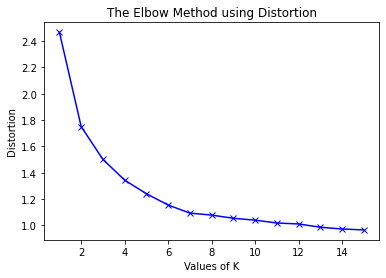

In [ ]:
# Elbow method para determinar o número ótimo de clusters ( O núemro que diminui o SRE ( Square Root Error))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


In [ ]:
df = cluster(AliBeb,7,dropcol)

In [ ]:
files.upload()

Saving functions.py to functions.py


{'functions.py': b'# -*- coding: utf-8 -*-\n"""C\xc3\xb3pia de functionsjey.ipynb\n\nAutomatically generated by Colaboratory.\n\nOriginal file is located at\n    https://colab.research.google.com/drive/1ieuu7okRYEzlkV5FZnFK4kFKuC4cDww3\n"""\n\n# Fun\xc3\xa7\xc3\xa3o para colocar label em gr\xc3\xa1fico de barras.\ndef add_value_labels(ax, spacing=5):\n    """Add labels to the end of each bar in a bar chart.\n\n    Arguments:\n        ax (matplotlib.axes.Axes): The matplotlib object containing the axes\n            of the plot to annotate.\n        spacing (int): The distance between the labels and the bars.\n    """\n\n    # For each bar: Place a label\n    for rect in ax.patches:\n        # Get X and Y placement of label from rect.\n        y_value = rect.get_height()\n        x_value = rect.get_x() + rect.get_width() / 2\n\n        # Number of points between bar and label. Change to your liking.\n        space = spacing\n        # Vertical alignment for positive values\n        va = 

In [ ]:
import functions

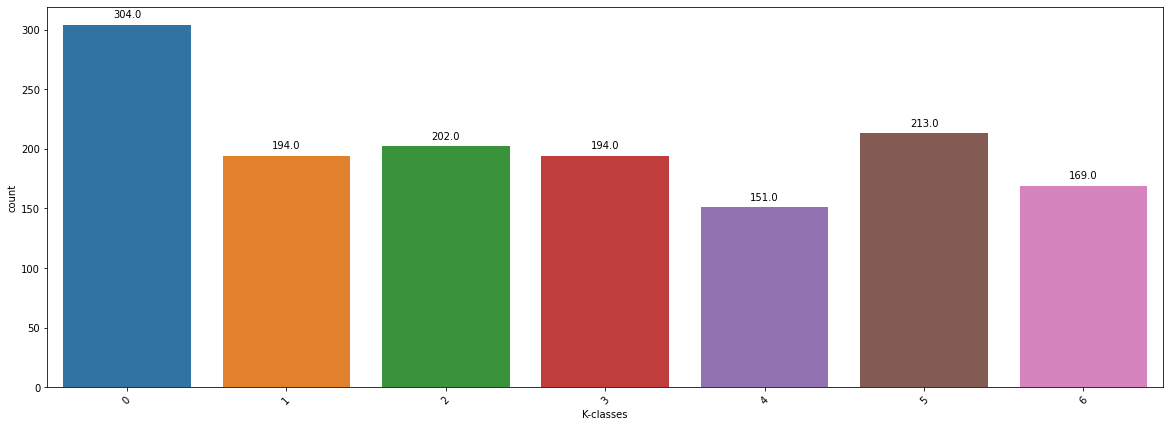

In [ ]:
#@title 6 - Observando a distribuição dos clusters.

labels = AliBeb['K-classes'].tolist()
from textwrap import wrap
plt.rcParams['figure.figsize'] = (20,7)
ax=sb.countplot ( x= 'K-classes', data= AliBeb)
plt.xticks(rotation=45)
functions.add_value_labels(ax)
plt.show()

In [ ]:
df

,Loja física_perc,Loja virtual_perc,Marketplaces Delivery_perc,Marketplaces E-commerce_perc,Telefone_perc,WhatsApp_perc,Catálogo online_perc,Correios e transportadoras_perc,Empresa de entregas_perc,Entrega na região_perc,Entregadores dos apps de delivery_perc,Faz entrega pessoalmente_perc,Motoboys contratados_perc,Não faz entregas_perc,Retirada_perc
0,10.197368,5.592105,3.289474,3.947368,15.789474,81.907895,NaN,15.789474,1.973684,100.000000,3.618421,89.802632,13.486842,0.657895,17.434211
1,40.206186,7.731959,9.793814,3.608247,37.628866,100.000000,17.010309,14.432990,0.515464,2.061856,1.546392,NaN,NaN,13.917526,61.855670
2,11.386139,6.435644,6.435644,3.960396,25.742574,88.613861,100.000000,20.792079,4.455446,100.000000,12.871287,89.108911,11.881188,0.990099,42.079208
3,7.216495,12.371134,3.092784,12.371134,14.948454,85.567010,41.237113,96.907216,0.515464,2.061856,1.030928,NaN,NaN,2.061856,25.773196
4,64.900662,4.635762,2.649007,2.649007,11.920530,NaN,7.284768,3.973510,0.662252,8.609272,1.986755,NaN,3.973510,20.529801,43.708609
5,50.704225,21.126761,10.798122,23.943662,46.478873,95.305164,58.215962,71.361502,17.840376,100.000000,25.821596,55.868545,78.403756,0.469484,92.488263
6,68.047337,7.100592,12.426036,8.284024,78.698225,91.124260,7.100592,8.284024,5.325444,100.000000,7.692308,94.674556,18.934911,0.591716,86.390533


In [ ]:
AliBeb

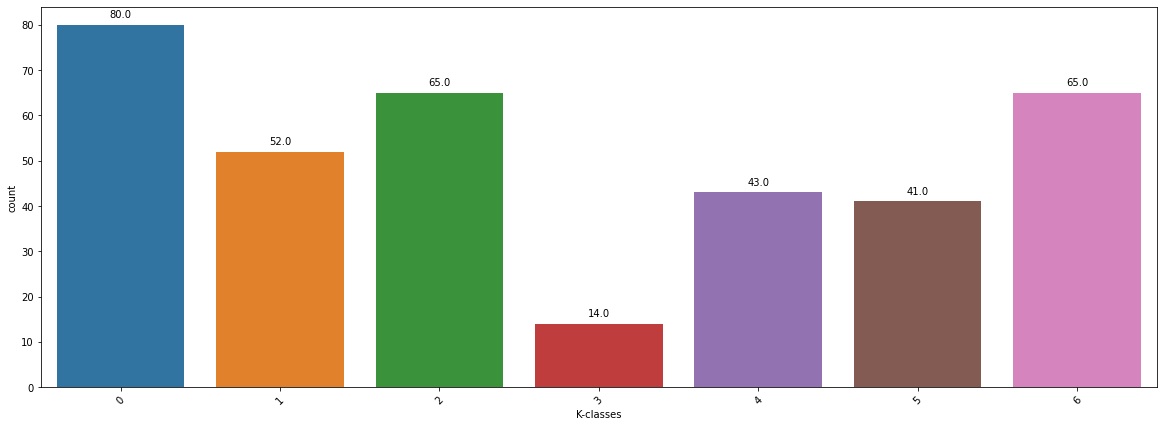

In [ ]:
#@title #Observando a distribuição dos clusters por ramo.
ramo = "Alimentos e bebidas" #@param {type:"string"}
Ramo = AliBeb[AliBeb['First Ramo de atividade']==ramo]
labels = AliBeb['K-classes'].tolist()
from textwrap import wrap
plt.rcParams['figure.figsize'] = (20,7)
ax=sb.countplot ( x= 'K-classes', data= Ramo)
plt.xticks(rotation=45)
functions.add_value_labels(ax)
plt.show()

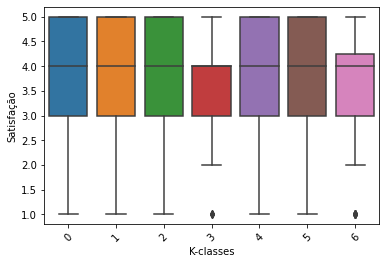

In [ ]:
satis = AliBeb[['K-classes','Satisfação']]
satis = satis.dropna()
satis = satis.query('Satisfação<=5')
sb.boxplot(x='K-classes', y='Satisfação', data=satis)
plt.xticks(rotation=45)
plt.show()

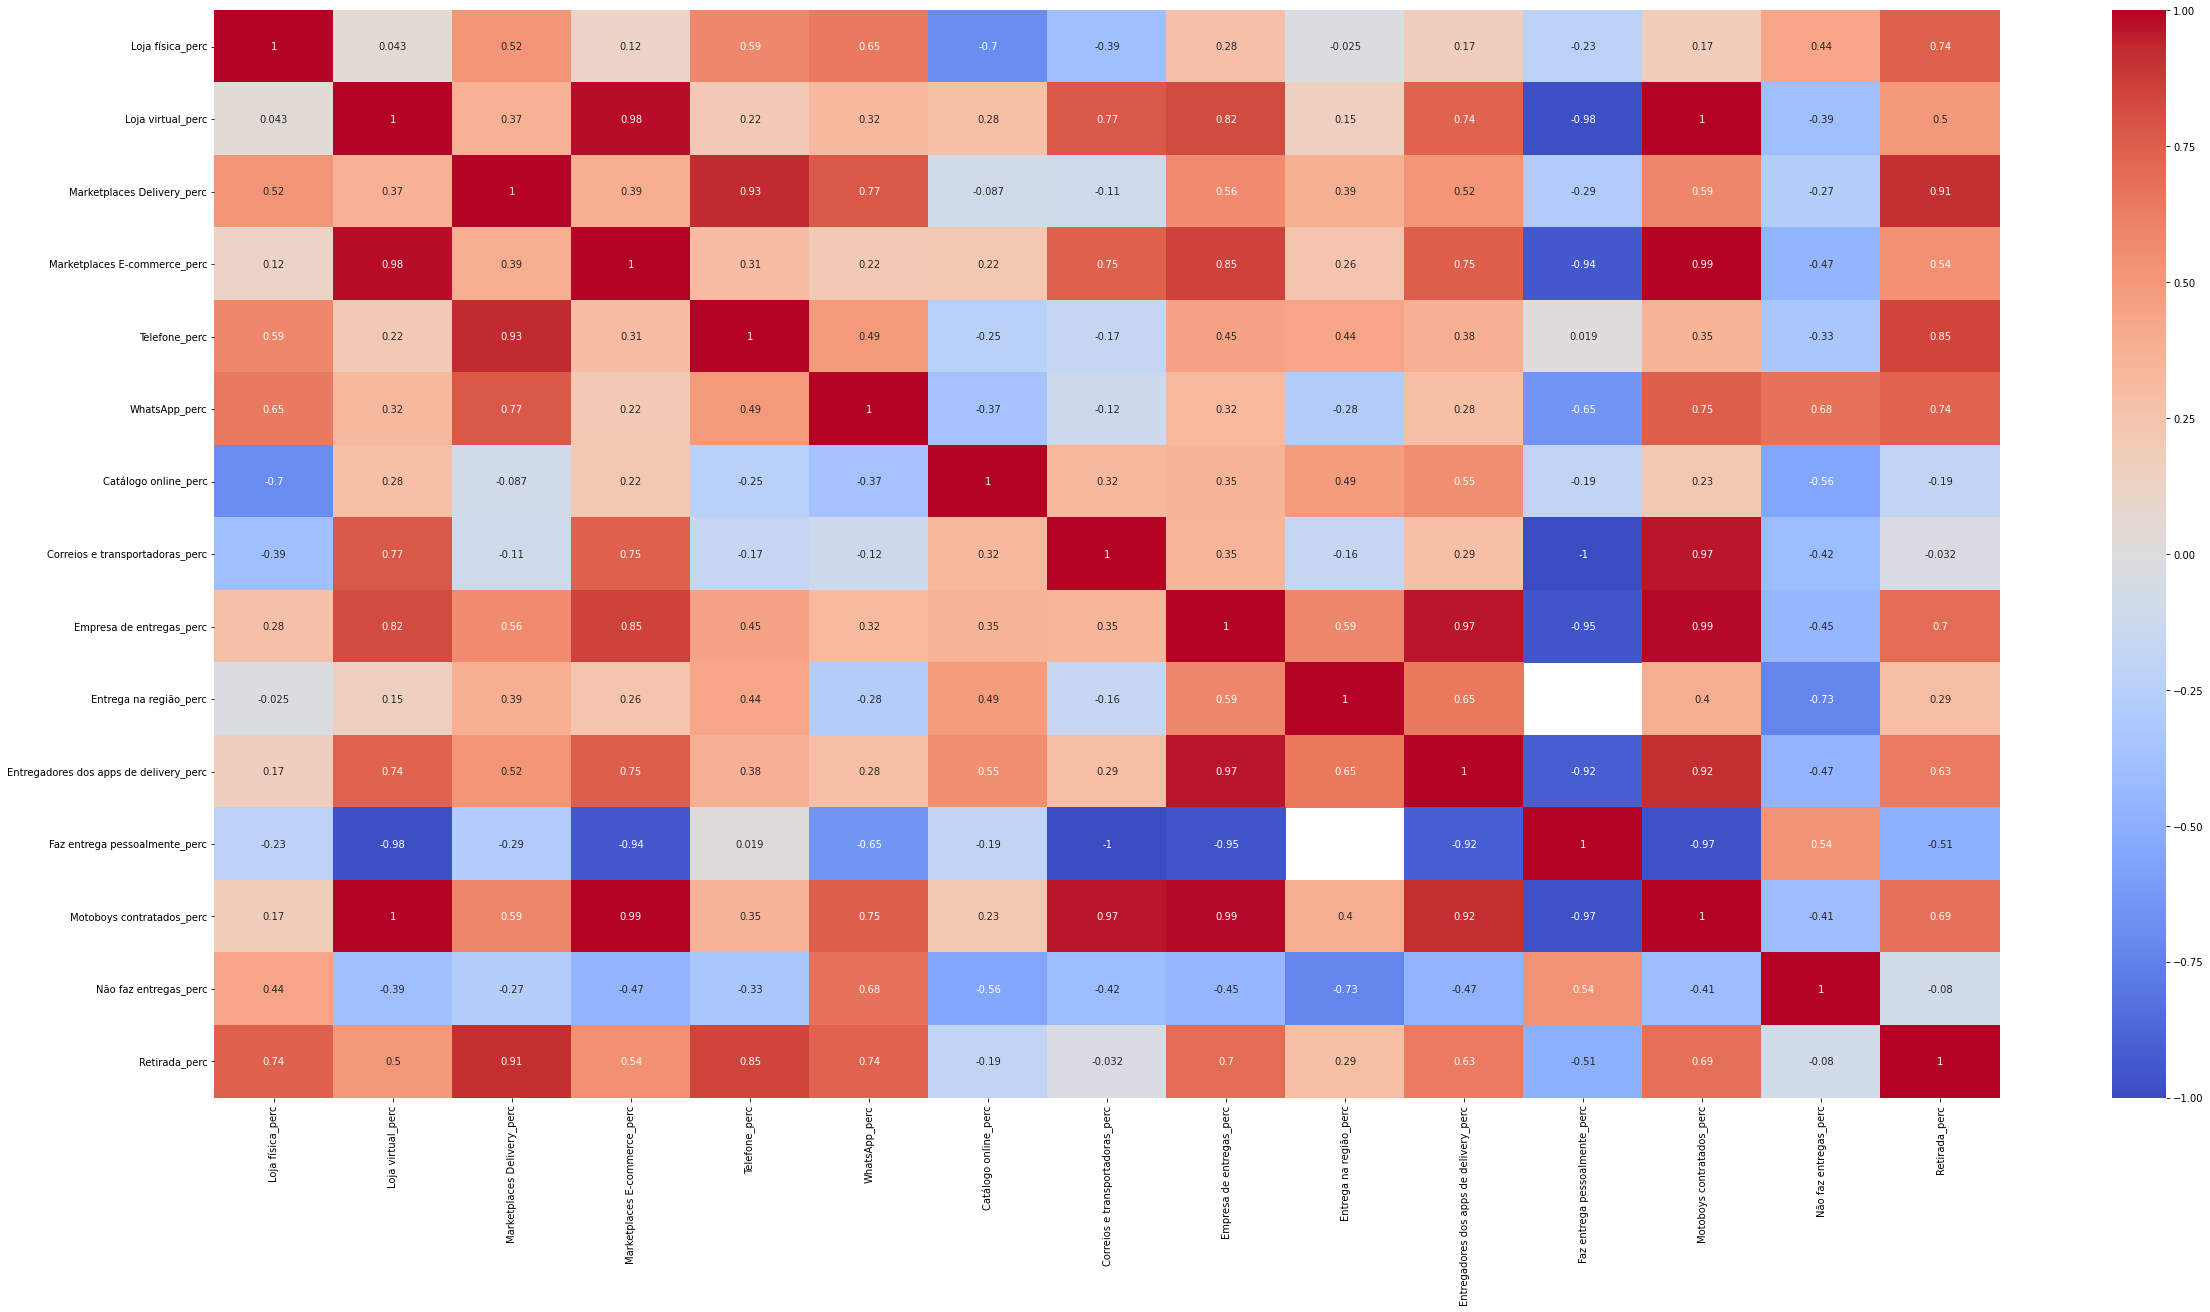

In [ ]:
figue = plt.figure(figsize=(40,20))
sb.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

In [ ]:
satis.med

K-classes     2.5
Satisfação    4.0
dtype: float64

In [ ]:
df.corr()

,Loja física_perc,Loja virtual_perc,Marketplaces Delivery_perc,Marketplaces E-commerce_perc,Telefone_perc,WhatsApp_perc,Catálogo online_perc,Correios e transportadoras_perc,Empresa de entregas_perc,Entrega na região_perc,Entregadores dos apps de delivery_perc,Faz entrega pessoalmente_perc,Motoboys contratados_perc,Não faz entregas_perc,Retirada_perc
Loja física_perc,1.000000,0.043424,0.521817,0.121893,0.585574,0.645735,-0.695348,-0.391550,0.279956,-0.025486,0.171536,-0.228025,0.173756,0.441621,0.742693
Loja virtual_perc,0.043424,1.000000,0.369443,0.977249,0.216727,0.324592,0.284497,0.774161,0.823623,0.154675,0.738168,-0.978056,0.996818,-0.393710,0.503968
Marketplaces Delivery_perc,0.521817,0.369443,1.000000,0.391654,0.928990,0.774091,-0.087086,-0.105233,0.563247,0.387084,0.520506,-0.293339,0.589192,-0.267638,0.909776
Marketplaces E-commerce_perc,0.121893,0.977249,0.391654,1.000000,0.310279,0.217464,0.224001,0.747169,0.853754,0.256398,0.754579,-0.937517,0.992914,-0.468650,0.543656
Telefone_perc,0.585574,0.216727,0.928990,0.310279,1.000000,0.493721,-0.245928,-0.165845,0.445351,0.443419,0.379496,0.019149,0.354180,-0.334792,0.845236
WhatsApp_perc,0.645735,0.324592,0.774091,0.217464,0.493721,1.000000,-0.369743,-0.123395,0.318615,-0.278961,0.281357,-0.653576,0.752924,0.679085,0.738176
Catálogo online_perc,-0.695348,0.284497,-0.087086,0.224001,-0.245928,-0.369743,1.000000,0.322568,0.352571,0.490899,0.551730,-0.189782,0.225574,-0.561832,-0.190367
Correios e transportadoras_perc,-0.391550,0.774161,-0.105233,0.747169,-0.165845,-0.123395,0.322568,1.000000,0.346901,-0.159319,0.285536,-0.998092,0.968697,-0.421255,-0.032085
Empresa de entregas_perc,0.279956,0.823623,0.563247,0.853754,0.445351,0.318615,0.352571,0.346901,1.000000,0.587910,0.967789,-0.953274,0.986830,-0.446724,0.702876
Entrega na região_perc,-0.025486,0.154675,0.387084,0.256398,0.443419,-0.278961,0.490899,-0.159319,0.587910,1.000000,0.652121,NaN,0.396149,-0.728336,0.293642
